In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'ampiezza_distanza.csv'
fr = pd.read_csv(FILE)

In [2]:
dMIN = np.abs(np.array(fr['Ricevitore MIN (piede) (cm)']) - np.array(fr['Emettitore (piede) (cm)'])) * 0.01
dMAX = np.abs(np.array(fr['Ricevitore MAX (piede) (cm)']) - np.array(fr['Emettitore (piede) (cm)'])) * 0.01

Vmin = np.array(fr['Vmin (Volt)'])
Vmax = np.array(fr['Vmax (Volt)'])
sigmaVmin = np.array(fr['sigmaVmin'])
sigmaVmax = np.array(fr['sigmaVmax'])

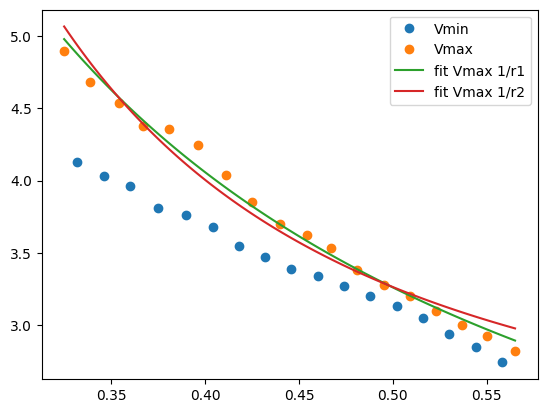

nan
41.27


In [3]:
f1 = lambda x,a,b: a/(x) + b
f2 = lambda x,a,b: a/(x**2) + b
i1 = Interpolazione(dMAX, Vmax,f1, sigmaVmin,[1,1])
i2 = Interpolazione(dMAX, Vmax,f2, sigmaVmax,[1,1])
plt.plot(dMIN, Vmin, 'o', label='Vmin')
plt.plot(dMAX, Vmax, 'o', label='Vmax')
plt.plot(i1.x_best, i1.y_best, label='fit Vmax 1/r1')
plt.plot(i2.x_best, i2.y_best, label='fit Vmax 1/r2')
plt.legend()
plt.show()
print(i1.rchisquare)
print(i2.rchisquare)

# GRUPPO DI CONTROLLO

In [4]:
maxControllo = np.array(fr['MAX (cm) controllo'])[0:7]
VmaxControllo = np.array(fr['Vmax (volt) controllo'])[0:7]
sigmaVmaxControllo = np.array(fr['sigmaVmax controllo'])[0:7]

dcontrollo = np.abs(maxControllo - np.array(fr['Emettitore controllo'])[0:7]) * 0.01

In [5]:
i = Interpolazione(dcontrollo, VmaxControllo, f1, sigmaVmaxControllo, [1,1])

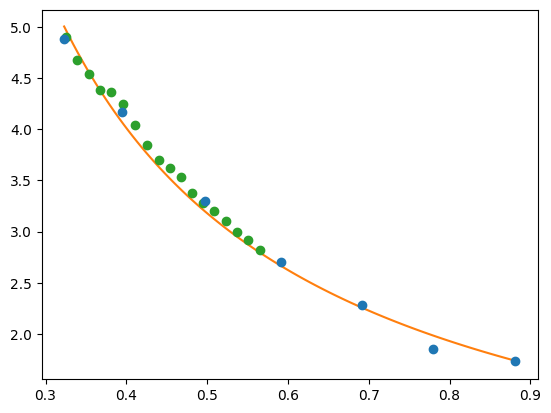

In [6]:
plt.errorbar(dcontrollo, VmaxControllo, yerr=sigmaVmaxControllo, fmt='o', label='Vmax controllo')
plt.plot(i.x_best, i.y_best, label='fit Vmax controllo 1/r')

plt.plot(dMAX, Vmax, 'o', label='Vmax')
plt.show()